# Analisis de sentimientos

## **0. Business Case**


•	**Seleccion del proyecto (Bases de datos)**
Extracción de datos del ayuntamiento del municipio de Mostoles de la comunidad de Madrid a partir de las reseñas en Google, **mediante** técnicas de Web Scraping, APIs o aplicaciones que permitan su extracción.


•	**Definición del problema o la oportunidad:**
Evaluar la evolución de la percepción de satisfacción de los ciudadanos hacia la alcaldía a través del análisis de las reseñas de Google y proporcionar insights para mejorar la gestión y la satisfacción del público.

**•	Definir los Objetivos del proyecto:**
1.   Estimar cual es el sentimiento predominante de los reviews frente a dicho ayuntamiento
2. Evaluar la evolución percepción pública de la alcaldía desde el origen de las reviews publicadas
3.   Encontrar cuales son los aspectos más relevantes sobre los que más opinan los reviewers
4.   Reconocer la importancia de las reseñas de Google como una fuente valiosa de retroalimentación para entender las preocupaciones y expectativas de los ciudadanos.


**•	Solución propuesta:** Los siguientes son los pasos propuestos para solucionar el problema mencionado:
1.	Recopilación de datos:
- Extracción de información mediante técnicas de Web Scraping, APIs o aplicaciones que permitan su extracción.
- Almacenamiento de los datos en un formato estructurado que permita su análisis posterior.
2.	Preprocesamiento de datos:
- Limpieza de datos para eliminar reseñas duplicadas, irrelevantes o spam.
- Normalizar el texto de las reseñas, eliminando caracteres especiales y convirtiéndolo todo a minúsculas para un análisis uniforme.
- Realizar una clasificación por fecha para organizar las reseñas en orden cronológico.
3.	Análisis de sentimientos:
- Utilizar técnicas de ML para asignar un puntaje de sentimiento a cada reseña.
- Clasificar las reseñas como positivas, neutrales o negativas según el puntaje de sentimiento obtenido.
4.	Visualización y análisis exploratorio de datos:
- Crear gráficos y visualizaciones que muestren la distribución del sentimiento a lo largo del tiempo.
- Identificar tendencias, picos de positividad o negatividad, y patrones recurrentes en las reseñas.
5.	Identificación de temas clave:
- Utilizar técnicas de análisis de temas para identificar los temas más frecuentes mencionados en las reseñas.
- Categorizar los temas en áreas como infraestructura, servicios públicos, transporte, seguridad, fiestas, salud, limpieza de acuerdo a los resultados
6.	Generación de insights y recomendaciones:
- Evaluar cuál es el sentimiento popular frente al ente de estudio.
- Analizar los resultados obtenidos del análisis de sentimientos y la identificación de temas clave.
- Identificar si cual ha sido la evolución de las opiniones durante el periodo determinado del estudio  
- Formular recomendaciones específicas para mejorar la gestión y la satisfacción del público en áreas identificadas como críticas.




## **1. Recopilación de la información**

• La extracción de datos de la alcaldia/ayuntamiento del municipal se realiza a partir de las reseñas en Google, mediante técnicas de Web Scraping mediante la aplicación Instant Data Scraper.

## **2. Preprocesamiento de los datos**

Se realiza la limpieza de los datos de datos se realizan las siguientes tareas:

1.   Reemplazo de nombre de encabezados
2.   Eliminacion valores NAN
3.   Elemento de lista
4.   Redimensionar columnas
5.   Calcular credibilidad de los reviewers
6.   Arreglar dieresis
7.   Eliminación de espacios y carácteres especiales
8.   Transformacion a minusculas
9.   Transformación a Datetime
10.  Tokenización
10.  Eliminación de stopwords

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
import re
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from nltk.stem import SnowballStemmer
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import spacy
import spacy.displacy
import re
from datetime import datetime, timedelta
from PIL import Image


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
file_path = "/content/opiniones_ayuntamientos.csv"
df = pd.read_csv(file_path)
print(df.head())

                                          NBa7we src           d4r55  \
0  https://lh3.googleusercontent.com/a-/ALV-UjX0E...           María   
1  https://lh3.googleusercontent.com/a-/ALV-UjXLg...    Luis Barrios   
2  https://lh3.googleusercontent.com/a-/ALV-UjXq6...   Carol Cortijo   
3  https://lh3.googleusercontent.com/a/ACg8ocIZlX...  Albert McTorre   
4  https://lh3.googleusercontent.com/a-/ALV-UjUvZ...         Oyasita   

                                       RfnDt            rsqaWe  \
0      Local Guide · 49 opiniones · 19 fotos       Hace 4 días   
1  Local Guide · 233 opiniones · 1,319 fotos     Hace 11 meses   
2                                5 opiniones  una semana atrás   
3       Local Guide · 22 opiniones · 5 fotos      Hace 7 meses   
4      Local Guide · 21 opiniones · 18 fotos       Hace 2 años   

                                              wiI7pd dSlJg dSlJg 2      znYl0  \
0  He puesto una queja en la Junta de distrito y ...              Compartir   
1  Muy b

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
print(type(df))
#Vista de encabezado y primeras lineas de datos
print(df.head())
#Revision de todas las columnas del df
print(df.columns)
#eliminar las columnas del df
df = df.drop(columns=['dSlJg', 'dSlJg 2', "znYl0", "znYl0 2"])
print(df.columns)
#Revision de todas las columnas del df
print(df.columns)
#renombrar los encabezados de las columnas del df
df = df.rename(columns={"NBa7we src": 'link usuario', "d4r55": 'nombre usuario',
                        "RfnDt": 'record usuario', "rsqaWe": 'tiempo de registro',
                        "wiI7pd": 'opinion'})

<class 'pandas.core.frame.DataFrame'>
                                          NBa7we src           d4r55  \
0  https://lh3.googleusercontent.com/a-/ALV-UjX0E...           María   
1  https://lh3.googleusercontent.com/a-/ALV-UjXLg...    Luis Barrios   
2  https://lh3.googleusercontent.com/a-/ALV-UjXq6...   Carol Cortijo   
3  https://lh3.googleusercontent.com/a/ACg8ocIZlX...  Albert McTorre   
4  https://lh3.googleusercontent.com/a-/ALV-UjUvZ...         Oyasita   

                                       RfnDt            rsqaWe  \
0      Local Guide · 49 opiniones · 19 fotos       Hace 4 días   
1  Local Guide · 233 opiniones · 1,319 fotos     Hace 11 meses   
2                                5 opiniones  una semana atrás   
3       Local Guide · 22 opiniones · 5 fotos      Hace 7 meses   
4      Local Guide · 21 opiniones · 18 fotos       Hace 2 años   

                                              wiI7pd dSlJg dSlJg 2      znYl0  \
0  He puesto una queja en la Junta de distrito y ..

In [ ]:
df = pd.read_csv(file_path)
print(df.head())

print(type(df))
#Vista de encabezado y primeras lineas de datos
print(df.head())
#Revision de todas las columnas del df
print(df.columns)
#eliminar las columnas del df
df = df.drop(columns=['dSlJg', 'dSlJg 2', "znYl0", "znYl0 2"])
print(df.columns)
#Revision de todas las columnas del df
print(df.columns)
#renombrar los encabezados de las columnas del df
df = df.rename(columns={"NBa7we src": 'link usuario', "d4r55": 'nombre usuario',
                        "RfnDt": 'record usuario', "rsqaWe": 'tiempo de registro',
                        "wiI7pd": 'opinion'})

print(df.columns)
print(df.describe())
# Verificar si hay valores NaN en todo el df
valores_nan = df.isna().any().any()

if valores_nan:
    print("Si hay valores NaN")
else:
    print("No hay valores NaN")

for column in df:
    print(f"El número de valores nulos en '{column}' es {df[column].isna().sum()}")

# Eliminar los valore Nan
df = df.dropna()

#verficar si aun hay valores Nan
if df.isna().any().any():
    print("Si hay valores NaN")
else:
    print("No hay valores NaN")

print(df.describe())

#Observar de columna record de usuario para su transformacion y estratificacion
print(df["record usuario"].head(30))


                                          NBa7we src           d4r55  \
0  https://lh3.googleusercontent.com/a-/ALV-UjX0E...           María   
1  https://lh3.googleusercontent.com/a-/ALV-UjXLg...    Luis Barrios   
2  https://lh3.googleusercontent.com/a-/ALV-UjXq6...   Carol Cortijo   
3  https://lh3.googleusercontent.com/a/ACg8ocIZlX...  Albert McTorre   
4  https://lh3.googleusercontent.com/a-/ALV-UjUvZ...         Oyasita   

                                       RfnDt            rsqaWe  \
0      Local Guide · 49 opiniones · 19 fotos       Hace 4 días   
1  Local Guide · 233 opiniones · 1,319 fotos     Hace 11 meses   
2                                5 opiniones  una semana atrás   
3       Local Guide · 22 opiniones · 5 fotos      Hace 7 meses   
4      Local Guide · 21 opiniones · 18 fotos       Hace 2 años   

                                              wiI7pd dSlJg dSlJg 2      znYl0  \
0  He puesto una queja en la Junta de distrito y ...              Compartir   
1  Muy b

In [ ]:
# Función para procesar la columna record usuario y estratificarla de acuerdo a la influencia de cada reseñador
def process_info(info):
    local_guide = 'Local Guide' in info
    opiniones = re.search(r'(\d{1,3}(?:,\d{3})*) opiniones', info)
    fotos = re.search(r'(\d{1,3}(?:,\d{3})*) fotos', info)

    num_opiniones = int(opiniones.group(1).replace(',', '')) if opiniones else 0
    num_fotos = int(fotos.group(1).replace(',', '')) if fotos else 0

    return local_guide, num_opiniones, num_fotos

# Aplicar la función a cada fila de 'record usuario, se crean 3 columns a partir de la funcion'
df[['Local Guide', 'Opiniones', 'Fotos']] = df['record usuario'].apply(lambda x: pd.Series(process_info(x)))

print(df.columns)
print(df.head())

# Función para calcular la credibilidad de acuerdo al sumario de los reseñadores
def calcular_credibilidad(local_guide, opiniones, fotos):
    score = 0
    if local_guide:
        score += 0
    score += opiniones * 10  # 10 puntos por cada opinión
    score += fotos * 5       # 5 puntos por cada foto
    return score

# Aplicar la fórmula de credibilidad de acuerdo al sumario de los reseñadores
df['Credibilidad'] = df.apply(lambda row: calcular_credibilidad(row['Local Guide'], row['Opiniones'], row['Fotos']), axis=1)

print(df['Credibilidad'].head())

#Explorar local guides
print(df['Local Guide'].sum())

print(df[df['Local Guide'] == False].value_counts)

vergu_count = df[df['opinion'].str.contains('vergu', case=False, na=False)].shape[0]

# Imprimir el conteo
print(f"Número de observaciones que contienen la palabra 'enza': {vergu_count}")
print(vergu_count)

# Crear un nuevo DataFrame que contenga solo las observaciones con la palabra 'vergu'
df_vergu = df[df['opinion'].str.contains('vergu', case=False, na=False)]

# Mostrar las primeras filas del nuevo DataFrame para verificar
print(df_vergu["opinion"].head(50))


# También puedes imprimir el número total de observaciones encontradas
print(f"Número total de observaciones que contienen la palabra 'vergu': {df_vergu.shape[0]}")

# Crear un nuevo DataFrame que contenga solo las observaciones con la palabra 'vergu'
df_enza = df[df['opinion'].str.contains('enza', case=False, na=False)]

# Mostrar las primeras filas del nuevo DataFrame para verificar
print(df_enza["opinion"].head(50))

# También puedes imprimir el número total de observaciones encontradas
print(f"Número total de observaciones que contienen la palabra 'enza': {df_vergu.shape[0]}")


Index(['link usuario', 'nombre usuario', 'record usuario',
       'tiempo de registro', 'opinion', 'Local Guide', 'Opiniones', 'Fotos'],
      dtype='object')
                                        link usuario  nombre usuario  \
0  https://lh3.googleusercontent.com/a-/ALV-UjX0E...           María   
1  https://lh3.googleusercontent.com/a-/ALV-UjXLg...    Luis Barrios   
2  https://lh3.googleusercontent.com/a-/ALV-UjXq6...   Carol Cortijo   
3  https://lh3.googleusercontent.com/a/ACg8ocIZlX...  Albert McTorre   
4  https://lh3.googleusercontent.com/a-/ALV-UjUvZ...         Oyasita   

                              record usuario tiempo de registro  \
0      Local Guide · 49 opiniones · 19 fotos        Hace 4 días   
1  Local Guide · 233 opiniones · 1,319 fotos      Hace 11 meses   
2                                5 opiniones   una semana atrás   
3       Local Guide · 22 opiniones · 5 fotos       Hace 7 meses   
4      Local Guide · 21 opiniones · 18 fotos        Hace 2 años   

     

In [ ]:
# Función para transformar el texto en formatos fecha datetime mes-año
def parse_fecha(texto):
    now = datetime.now()
    if 'mes' in texto:
        months = int(re.search(r'\d+', texto).group()) if re.search(r'\d+', texto) else 1
        date = now - timedelta(days=30*months)
    elif 'año' in texto:
        years = int(re.search(r'\d+', texto).group()) if re.search(r'\d+', texto) else 1
        date = now - timedelta(days=365*years)
    elif 'semana' in texto:
        weeks = int(re.search(r'\d+', texto).group()) if re.search(r'\d+', texto) else 1
        date = now - timedelta(weeks=weeks)
    elif 'día' in texto:
        days = int(re.search(r'\d+', texto).group()) if re.search(r'\d+', texto) else 1
        date = now - timedelta(days=days)
    else:
        date = now  # Para casos no previstos, retorna la fecha actual
    return date.strftime('%Y')

# Aplicar la función a la columna tiempo de registro
df['Fecha'] = df['tiempo de registro'].apply(parse_fecha)

print(df["Fecha"].head(30))

print(df.columns)

duplicated_records = df[df["record usuario"].duplicated(keep=False)]
print(duplicated_records.head())

#Eliminamos las columnas previamente transformadas
df = df.drop(columns=["record usuario", "tiempo de registro"])
print(df.columns)

# Convert the text to lowercase
df["opinion"]= df["opinion"].str.lower()

#Eliminacion de espacios excedentes de palabras, www, remmplozas de @
df['opinion'] = df['opinion'].replace({
    r'\s+': ' ',  # Reemplazar múltiples espacios por un solo espacio
    r'@': 'o',    # Reemplazar @ con o
    r'www': ''    # Eliminar www
}, regex=True)

# Función para eliminar caracteres especiales
def remove_special_characters(text):
    # Utiliza una expresión regular para eliminar caracteres especiales y espacios en blanco (se excluyen las vocales con acentos)
    return re.sub(r'[^a-zA-ZüÜáéíóúÁÉÍÓÚñÑ$€0-9\s]', ' ', text)

# Aplica la función a toda la columna
df_opinion= df["opinion"].apply(remove_special_characters)
print(df["opinion"].head(15))
print(df["opinion"].tail(15))


0     2024
1     2023
2     2024
3     2023
4     2022
5     2024
6     2024
7     2023
8     2024
9     2024
10    2024
11    2024
12    2024
13    2024
14    2024
15    2023
16    2024
17    2023
18    2023
19    2024
20    2023
21    2023
22    2023
23    2023
24    2023
25    2023
26    2023
27    2023
28    2023
29    2023
Name: Fecha, dtype: object
Index(['link usuario', 'nombre usuario', 'record usuario',
       'tiempo de registro', 'opinion', 'Local Guide', 'Opiniones', 'Fotos',
       'Credibilidad', 'Fecha'],
      dtype='object')
                                        link usuario  \
2  https://lh3.googleusercontent.com/a-/ALV-UjXq6...   
3  https://lh3.googleusercontent.com/a/ACg8ocIZlX...   
5  https://lh3.googleusercontent.com/a-/ALV-UjVWO...   
8  https://lh3.googleusercontent.com/a/ACg8ocKr3-...   
9  https://lh3.googleusercontent.com/a-/ALV-UjXPL...   

             nombre usuario                        record usuario  \
2             Carol Cortijo                   

In [ ]:
#Descargar y poner dentro de una variable las stop words
nltk.download('stopwords')
stop_words_sp = stopwords.words('spanish')


###### TOKENIZACION #######
def tokenize_text(text):
    return word_tokenize(text)

# Aplicar tokenización a toda la columna 'Texto'
df['Tokens'] = df_opinion.apply(tokenize_text)

# Mostrar el DataFrame con la nueva columna 'Tokens'
print(df['Tokens'].head(15))

# Función para limpiar la lista de tokens
def clean_tokens(tokens):
    if isinstance(tokens, list): # Verificar si tokens es una lista
        # Eliminar espacios en blanco adicionales y stopwords
        clean_tokens = [re.sub(r'\s+', ' ', word.strip()) for word in tokens if word.strip() not in stop_words_sp]
        return clean_tokens
    else: # Si tokens es NaN, devuelve una lista vacía
        return []

# Aplicar la limpieza de tokens a toda la columna 'Tokens'
df['Cleaned_Tokens'] = df['Tokens'].apply(clean_tokens)

# Mostrar el DataFrame con la nueva columna 'Cleaned_Tokens'

print(df['Cleaned_Tokens'].head(100))
print(df['Cleaned_Tokens'].tail(50))

print(df.head())

0     [he, puesto, una, queja, en, la, junta, de, di...
1     [muy, bien, situado, en, todo, el, centro, de,...
2     [quiero, mencionar, a, ivan, trabajador, del, ...
3     [desde, hace, aproximadamente, 2, meses, lleva...
4     [para, sacar, un, simple, volante, de, empadro...
5     [para, cuando, la, limpieza, delas, calles, de...
6     [cambien, las, sopladoras, de, hojas, por, sop...
7     [aunque, abren, a, las, 9, mañana, los, munici...
8     [quiero, felicitar, al, equipo, que, ha, monta...
9     [fui, hace, unos, meses, y, todo, perfecto, me...
10    [me, parece, de, lo, más, cutre, el, alumbrado...
11     [bien, mucho, tráfico, en, entradas, y, salidas]
12    [algunos, de, los, funcionarios, dejan, mucho,...
13    [le, han, robado, a, mi, madre, 700€, por, la,...
14    [fui, a, pedir, un, empadronamiento, histórico...
Name: Tokens, dtype: object
0     [puesto, queja, junta, distrito, ayuntamiento,...
1     [bien, situado, centro, móstoles, junto, tipo,...
2     [quiero, menci

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


*Se realiza un WORDCLOUD, para tener una primera impresión de las palabras más relevantes en la exploracín y observar expresiones que son relevantes y que pueden ser redundantes para el estudio y pueden ocultar algunos mensajes importantes debido a su frecuencia. Por ejemplo ayuntamiento *

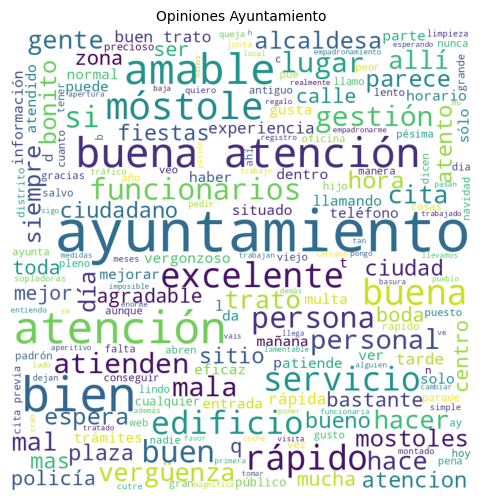

In [ ]:
"""
#Descargar y poner dentro de una variable las stop words
nltk.download('stopwords')
stop_words_sp = stopwords.words('spanish')
"""
#wordcloud DESPUES de aplicar el filtro de stopwords en español
wordcloud = WordCloud(width=800, height=800, background_color='white',  stopwords=stop_words_sp, min_font_size=10).generate(df_opinion.to_string())
plt.figure(figsize=(14, 6), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Opiniones Ayuntamiento", fontdict={'fontsize': 10})
plt.show()

In [ ]:
###### TOKENIZACION #######
def tokenize_text(text):
    return word_tokenize(text)

# Aplicar tokenización a toda la columna 'Texto'
df['Tokens'] = df_opinion.apply(tokenize_text)

# Mostrar el DataFrame con la nueva columna 'Tokens'
print(df['Tokens'].head(15))

# Función para limpiar la lista de tokens
def clean_tokens(tokens):
    if isinstance(tokens, list): # Verificar si tokens es una lista
        # Eliminar espacios en blanco adicionales y stopwords
        clean_tokens = [re.sub(r'\s+', ' ', word.strip()) for word in tokens if word.strip() not in stop_words_sp]
        return clean_tokens
    else: # Si tokens es NaN, devuelve una lista vacía
        return []

# Aplicar la limpieza de tokens a toda la columna 'Tokens'
df['Cleaned_Tokens'] = df['Tokens'].apply(clean_tokens)

# Mostrar el DataFrame con la nueva columna 'Cleaned_Tokens'

print(df['Cleaned_Tokens'].head(100))
print(df['Cleaned_Tokens'].tail(50))


# Identificar los valores que son listas vacías en una columna de un DataFrame
valores_vacios = df['Cleaned_Tokens'].apply(lambda x: isinstance(x, list) and len(x) == 0)

# Obtener los índices de las filas con valores vacíos
indices_valores_vacios = valores_vacios[valores_vacios].index

# Eliminar las filas con valores vacíos de forma permanente
df.drop(indices_valores_vacios, inplace=True)

print(df['Cleaned_Tokens'].head(50))
print(df['Cleaned_Tokens'].tail(50))
###### Filas con valores vacíos han sido eliminadas permanentemente del DataFrame



0     [he, puesto, una, queja, en, la, junta, de, di...
1     [muy, bien, situado, en, todo, el, centro, de,...
2     [quiero, mencionar, a, ivan, trabajador, del, ...
3     [desde, hace, aproximadamente, 2, meses, lleva...
4     [para, sacar, un, simple, volante, de, empadro...
5     [para, cuando, la, limpieza, delas, calles, de...
6     [cambien, las, sopladoras, de, hojas, por, sop...
7     [aunque, abren, a, las, 9, mañana, los, munici...
8     [quiero, felicitar, al, equipo, que, ha, monta...
9     [fui, hace, unos, meses, y, todo, perfecto, me...
10    [me, parece, de, lo, más, cutre, el, alumbrado...
11     [bien, mucho, tráfico, en, entradas, y, salidas]
12    [algunos, de, los, funcionarios, dejan, mucho,...
13    [le, han, robado, a, mi, madre, 700€, por, la,...
14    [fui, a, pedir, un, empadronamiento, histórico...
Name: Tokens, dtype: object
0     [puesto, queja, junta, distrito, ayuntamiento,...
1     [bien, situado, centro, móstoles, junto, tipo,...
2     [quiero, menci

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import pipeline
from nltk.corpus import stopwords
import numpy as npANALISIS: Objetivo 2 temas mas relvantes que se hablan en relacion al ayuntamientos

## **3. Selección de la técnica de análisis**

ANALISIS DE SENTIMIENTOS: Se eligen 3 modelos de Transfer Learning que estan preentrenados para el analisis de sentimientos en Español y poder realizar su clasificiacion de resultados en positivo, neutro y negativo debido a la facilidad en contextos de tener un dataset pequeño y con recursos computacionales limitados.


1.   **Vader** (ver abajo resultados): Precisón de Vader contradictoria observaciones positivas categorizandolas como positivas y vicerversa y con una marcada tendecia a la cateogrizar neutralmente las observaciones del dataset
2.   **Textblop** (ver abajo resultados) : Precison del modelo totalmente deficiente categorizando el 100% de las observaciones del corpus como Neutras
3.   Transfomer: **nlptown/bert-base-multilingual-uncased-sentiment**





## **4. Visualización e Interpretacion de Resultados**

## **Objetivo 3: Encontrar cuales son los aspectos más relevantes sobre los que más opinan los reviewers**

Se aplica la técnica de bigramas y trigramas para encontrar los temas mas frecuentes sobre los que se opianan y adcionalmente se aplica un analisis de sentimientos con el modelo Transfomer: **nlptown/bert-base-multilingual-uncased-sentiment** para obtener la medida de sentimiento de cada una de los temas frecuentes.

Se adoptan las 2 tecnicas, el **trigrama** debido su alta especificidad, a pesar de su baja frecuencia; y el **Bigrama** por su alta frecuencia y su aun relevante especificidad.

                Bigram  Frequency  Sentiment
25      buena atención         24       -2.0
29         cita previa         14       -2.0
23          buen trato          8        0.0
41  excelente atención          6        0.5
12    atención público          5        1.0
73          pedir cita          5       -2.0
86         puedo decir          4        1.5
83       policía local          4        0.5
49           hace años          4        0.0
97        trato amable          4        1.5
                     Trigram  Frequency  Sentiment
99  puede aparcar residentes          2       -2.0
4    dos personas atendiendo          2       -0.5
1       atienden cita previa          2        1.0
5     general buena atención          2        1.0
78             peor zona sur          2       -2.0
3      buena atención rápido          2        1.0
2     buena atención público          2       -2.0
64   pena arreglan vergüenza          1       -2.0
73      peor atención puedes          1       

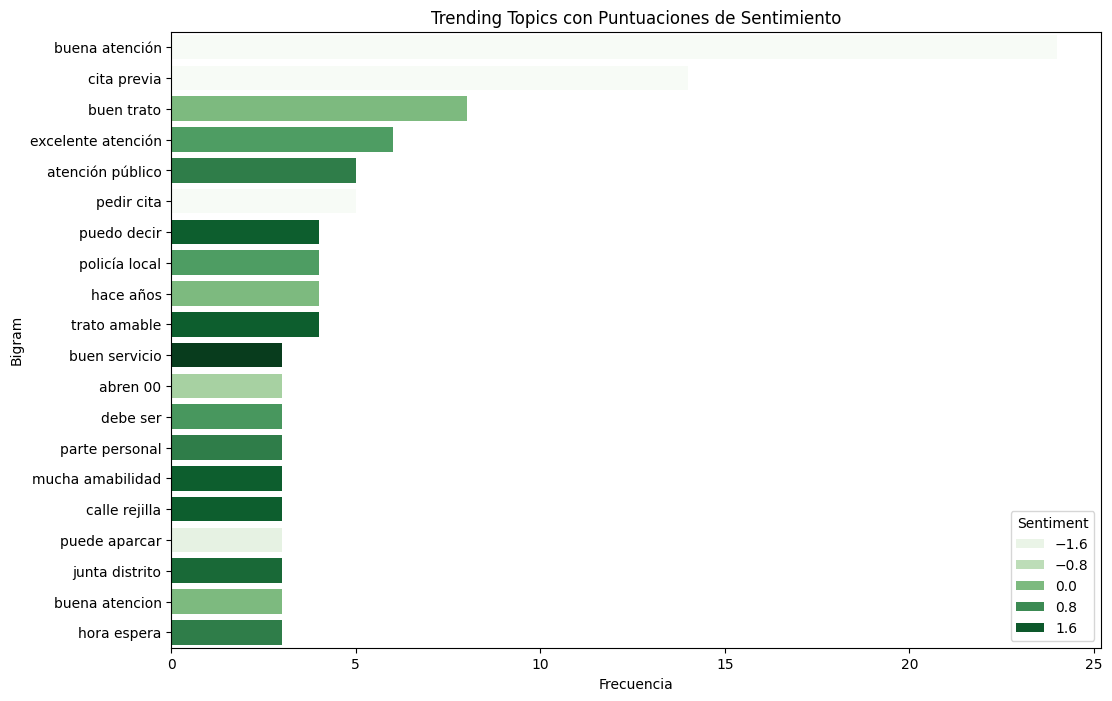

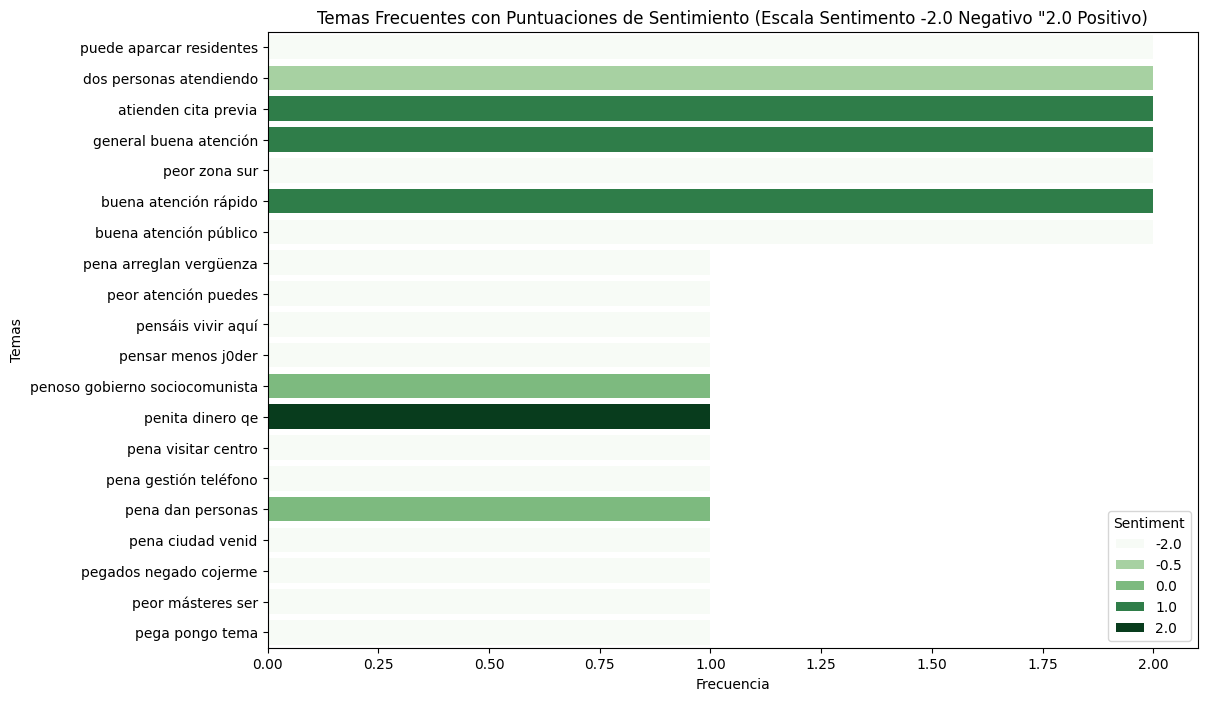

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import pipeline
from nltk.corpus import stopwords
import numpy as np


# Lista personalizada de stop words
custom_stop_words = stopwords.words('spanish') + ['ayuntamiento', 'mostoles', 'móstoles', 'madrid', "q", "aver"]

# Convertir los tokens a textos planos para TF-IDF
texts = [' '.join(tokens) for tokens in df['Cleaned_Tokens']]

# Crear bigramas con la lista personalizada de stop words
bigram_vectorizer = CountVectorizer(ngram_range=(2, 2), max_features=100, stop_words=custom_stop_words)
bigram_matrix = bigram_vectorizer.fit_transform(texts)

# Obtener los nombres de los bigramas y sus frecuencias
bigram_feature_names = bigram_vectorizer.get_feature_names_out()
bigram_scores = bigram_matrix.toarray().sum(axis=0)

# Convertir a DataFrame para facilitar la visualización
bigram_df = pd.DataFrame({'Bigram': bigram_feature_names, 'Frequency': bigram_scores}).sort_values(by='Frequency', ascending=False)

# Crear trigramas con la lista personalizada de stop words
trigram_vectorizer = CountVectorizer(ngram_range=(3, 3), max_features=100, stop_words=custom_stop_words)
trigram_matrix = trigram_vectorizer.fit_transform(texts)

# Obtener los nombres de los trigramas y sus frecuencias
trigram_feature_names = trigram_vectorizer.get_feature_names_out()
trigram_scores = trigram_matrix.toarray().sum(axis=0)

# Convertir a DataFrame para facilitar la visualización
trigram_df = pd.DataFrame({'Trigram': trigram_feature_names, 'Frequency': trigram_scores}).sort_values(by='Frequency', ascending=False)

# Cargar el modelo y el tokenizador
tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')
model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

# Crear pipeline de análisis de sentimientos
sentiment_pipeline = pipeline('sentiment-analysis', model=model, tokenizer=tokenizer)

# Función para analizar el sentimiento utilizando el modelo de Hugging Face
def analyze_sentiment(text):
    result = sentiment_pipeline(text)
    # Convertir la etiqueta de sentimiento a una escala numérica (-2: muy negativo, -1: negativo, 0: neutral, 1: positivo, 2: muy positivo)
    label_to_score = {'1 star': -2, '2 stars': -1, '3 stars': 0, '4 stars': 1, '5 stars': 2}
    return label_to_score[result[0]['label']]

# Agregar columna de sentimiento a las reseñas
df['Sentiment'] = df['Cleaned_Tokens'].apply(lambda tokens: analyze_sentiment(' '.join(tokens)))

# Calcular la puntuación de sentimiento promedio para cada bigrama
bigram_sentiments = []
for bigram in bigram_feature_names:
    bigram_texts = [texts[i] for i in range(len(texts)) if bigram in texts[i]]
    if bigram_texts:  # Verificar que la lista no esté vacía
        bigram_sentiment = np.mean([analyze_sentiment(text) for text in bigram_texts])
        bigram_sentiments.append(bigram_sentiment)
    else:
        bigram_sentiments.append(0)  # O algún valor por defecto
bigram_df['Sentiment'] = bigram_sentiments

# Calcular la puntuación de sentimiento promedio para cada trigrama
trigram_sentiments = []
for trigram in trigram_feature_names:
    trigram_texts = [texts[i] for i in range(len(texts)) if trigram in texts[i]]
    if trigram_texts:  # Verificar que la lista no esté vacía
        trigram_sentiment = np.mean([analyze_sentiment(text) for text in trigram_texts])
        trigram_sentiments.append(trigram_sentiment)
    else:
        trigram_sentiments.append(0)  # O algún valor por defecto
trigram_df['Sentiment'] = trigram_sentiments

# Mostrar los bigramas más frecuentes con sus puntuaciones de sentimiento
print(bigram_df.head(10))

# Mostrar los trigramas más frecuentes con sus puntuaciones de sentimiento
print(trigram_df.head(10))

# Graficar los bigramas más frecuentes con sus puntuaciones de sentimiento
plt.figure(figsize=(12, 8))
sns.barplot(x='Frequency', y='Bigram', hue='Sentiment', data=bigram_df.head(20), palette='Greens')
plt.title('Trending Topics con Puntuaciones de Sentimiento')
plt.xlabel('Frecuencia')
plt.ylabel('Bigram')
plt.show()

# Graficar los trigramas más frecuentes con sus puntuaciones de sentimiento
plt.figure(figsize=(12, 8))
sns.barplot(x='Frequency', y='Trigram', hue='Sentiment', data=trigram_df.head(20), palette='Greens')
plt.title('Temas Frecuentes con Puntuaciones de Sentimiento (Escala Sentimento -2.0 Negativo "2.0 Positivo)')
plt.xlabel('Frecuencia')
plt.ylabel('Temas')
plt.show()


In [ ]:
# Renombrar columnas en bigram_df
bigram_df.rename(columns={'Bigram': 'tema', 'Frequency': 'frecuencia', 'Sentiment': 'sentimiento'}, inplace=True)

# Clasificar los sentimientos
def clasificar_sentimiento(valor):
    if -0.5 <= valor <= 0.5:
        return 'neutro'
    elif valor > 0.5 and valor <= 2.0:
        return 'positivo'
    elif valor < -0.5 and valor >= -2.0:
        return 'negativo'
    else:
        return 'desconocido'

bigram_df['clasificacion_sentimiento'] = bigram_df['sentimiento'].apply(clasificar_sentimiento)

print(bigram_df.head())

# Guardar bigram_df en un archivo CSV
bigram_csv_path = 'bigram_df.csv'
bigram_df.to_csv(bigram_csv_path, index=False, encoding='utf-8')

# Renombrar columnas en trigram_df
trigram_df.rename(columns={'Trigram': 'tema', 'Frequency': 'frecuencia', 'Sentiment': 'sentimiento'}, inplace=True)

# Clasificar los sentimientos
trigram_df['clasificacion_sentimiento'] = trigram_df['sentimiento'].apply(clasificar_sentimiento)

print(trigram_df.head())

# Guardar trigram_df en un archivo CSV
trigram_csv_path = 'trigram_df.csv'
trigram_df.to_csv(trigram_csv_path, index=False, encoding='utf-8')


# Para descargar los archivos en tu computadora
from google.colab import files
files.download(bigram_csv_path)
files.download(trigram_csv_path)


                  tema  frecuencia  sentimiento clasificacion_sentimiento
25      buena atención          24         -2.0                  negativo
29         cita previa          14         -2.0                  negativo
23          buen trato           8          0.0                    neutro
41  excelente atención           6          0.5                    neutro
12    atención público           5          1.0                  positivo
                        tema  frecuencia  sentimiento  \
99  puede aparcar residentes           2         -2.0   
4    dos personas atendiendo           2         -0.5   
1       atienden cita previa           2          1.0   
5     general buena atención           2          1.0   
78             peor zona sur           2         -2.0   

   clasificacion_sentimiento  
99                  negativo  
4                     neutro  
1                   positivo  
5                   positivo  
78                  negativo  


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Objetivo 1: Estimar cual es el sentimiento predominante de los reviews frente a dicho ayuntamiento**



Realizamos el **ANALISIS DE SENTIMIENTOS**: Aplicando los modelos preentrenados **VADER**, seguido de **TextBlop** y finalmente con el modelo escogido **Transfomer: nlptown/bert-base-multilingual-uncased-sentiment**  

## **Objetivo 2: Evaluar la evolución percepción pública de la alcaldía desde el origen de las reviews publicadas 2018-2024**

0      0.0000
1      0.0000
2      0.0000
3     -0.3818
4      0.0000
5      0.0000
6      0.0000
7      0.0000
8      0.0000
9      0.3182
10     0.0000
11     0.0000
12     0.0000
13    -0.4019
14     0.0000
15     0.0000
16     0.0000
17     0.0000
18     0.0000
19     0.0000
20     0.0000
21     0.0000
22     0.6124
23     0.0000
24     0.0000
25     0.0000
26     0.0000
27     0.0000
28     0.0000
29     0.0000
30     0.0000
31     0.4019
32     0.0000
33     0.0000
34     0.0000
35     0.0000
36     0.0000
37     0.0000
38     0.0000
39     0.0000
40     0.3612
41     0.0000
42     0.0000
43     0.4019
44     0.4588
45     0.0000
46    -0.2960
47     0.4019
48     0.3612
49     0.0000
50     0.0000
51     0.0000
52     0.0000
53     0.0000
54     0.0000
55     0.0000
56     0.0000
57     0.4019
58     0.4019
59     0.0000
60     0.0000
61     0.0000
62     0.0000
63     0.0000
64     0.5994
65     0.0000
66     0.0000
67     0.0000
68     0.0000
69     0.0000
70     0.0000
71    

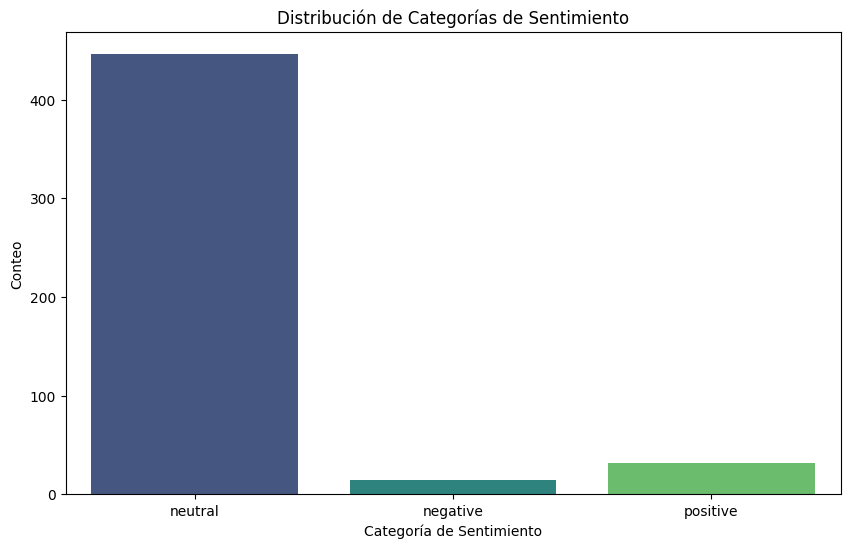

count      492
unique       7
top       2023
freq       101
Name: Fecha, dtype: object
<class 'pandas.core.series.Series'>
datetime64[ns]


In [ ]:
### OBJETIVO 1 y 3 ANALISIS DE SENTIMIENTOS ###
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


# Suponiendo que ya has cargado y limpiado tu DataFrame df

# Inicializar el analizador de sentimientos
analyzer = SentimentIntensityAnalyzer()

# Función para analizar el sentimiento
def analyze_sentiment_vader(text):
    try:
        scores = analyzer.polarity_scores(text)
        return scores['compound']
    except Exception as e:
        print(f"Error al analizar sentimiento de '{text}': {e}")
        return None

# Aplicar el análisis de sentimientos a la columna 'Cleaned_Tokens'
df['Sentiment_score'] = df['Cleaned_Tokens'].apply(lambda x: analyze_sentiment_vader(' '.join(x)))

# Mostrar los resultados
print(df['Sentiment_score'])
print(type(df['Sentiment_score']))
print(type(df['Cleaned_Tokens']))

# Función para clasificar el sentimiento
def classify_sentiment(score):
    if score is None:
        return 'neutral'  # Asignar 'neutral' si hay un error en el análisis
    if score > 0.05:
        return 'positive'
    elif score < -0.05:
        return 'negative'
    else:
        return 'neutral'

# Aplicar la clasificación de sentimiento a la columna 'Sentiment_score'
df['Sentiment'] = df['Sentiment_score'].apply(classify_sentiment)

# Mostrar los resultados
print(df[['Cleaned_Tokens', 'Sentiment_score', 'Sentiment']])

# Verificar los tipos de las columnas
print(type(df['Sentiment_score']))
print(type(df['Cleaned_Tokens']))


# Graficar las categorías de sentimiento
plt.figure(figsize=(10, 6))
sns.countplot(x='Sentiment', data=df, palette='viridis')
plt.title('Distribución de Categorías de Sentimiento')
plt.xlabel('Categoría de Sentimiento')
plt.ylabel('Conteo')
plt.show()

print(df["Fecha"].describe())
print(type(df["Fecha"]))
###############################################################

# Convertir la columna 'tiempo de registro' al formato datetime
df['Fecha'] = pd.to_datetime(df['Fecha'], errors='coerce')

# Verificar la conversión
print(df['Fecha'].dtype)

# Agrupar por fecha y sentimiento y contar las ocurrencias
sentiment_over_time = df.groupby(['Fecha', 'Sentiment']).size().unstack().fillna(0)



SEGUIMOS CON TEXTBLOB

Error al analizar sentimiento de 'puesto queja junta distrito ayuntamiento hecho resulta quitado contenedores subterráneos c cádiz registro civil total 4 orgánicos': name 'TextBlob' is not defined
Error al analizar sentimiento de 'bien situado centro móstoles junto tipo locales plazas verdad bien además buen trato amables especial agradecimiento policía resolvió unas dudas ayudo': name 'TextBlob' is not defined
Error al analizar sentimiento de 'quiero mencionar ivan trabajador ayuntamiento oficinas calle rejilla 11 chico estupendo preocupado ciudadanos atencion personalizada inmejorable hacia demás involucrado gente situacion gracias ivan ojala puedas ver algun dia': name 'TextBlob' is not defined
Error al analizar sentimiento de 'hace aproximadamente 2 meses lleva puente calle echegaray pasa encima vías tren cayéndose trozos arreglan esperando ayuntamiento accidente grave hacer': name 'TextBlob' is not defined
Error al analizar sentimiento de 'sacar simple volante empadronamiento 40 m

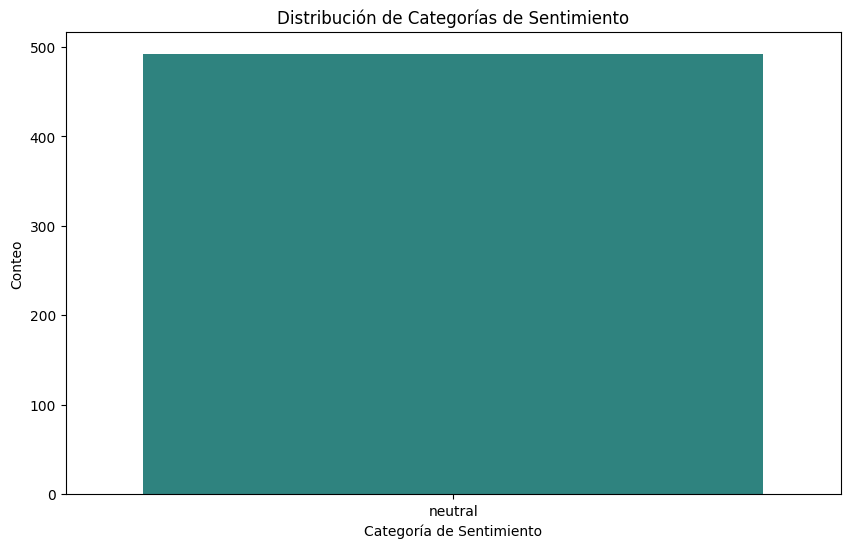

datetime64[ns]


In [ ]:
# Función para analizar el sentimiento con TextBlob
def analyze_sentiment_textblob(text):
    try:
        analysis = TextBlob(text)
        return analysis.sentiment.polarity
    except Exception as e:
        print(f"Error al analizar sentimiento de '{text}': {e}")
        return None

# Aplicar el análisis de sentimientos a la columna 'Cleaned_Tokens'
df['Sentiment_score'] = df['Cleaned_Tokens'].apply(lambda x: analyze_sentiment_textblob(' '.join(x)))

# Función para clasificar el sentimiento
def classify_sentiment(score):
    if score is None:
        return 'neutral'  # Asignar 'neutral' si hay un error en el análisis
    if score > 0.05:
        return 'positive'
    elif score < -0.05:
        return 'negative'
    else:
        return 'neutral'

# Aplicar la clasificación de sentimiento a la columna 'Sentiment_score'
df['Sentiment'] = df['Sentiment_score'].apply(classify_sentiment)

# Mostrar los resultados
print(df[['Fecha', 'Cleaned_Tokens', 'Sentiment_score', 'Sentiment']])

# Verificar los tipos de las columnas
print(type(df['Sentiment_score']))
print(type(df['Cleaned_Tokens']))

# Graficar las categorías de sentimiento
plt.figure(figsize=(10, 6))
sns.countplot(x='Sentiment', data=df, palette='viridis')
plt.title('Distribución de Categorías de Sentimiento')
plt.xlabel('Categoría de Sentimiento')
plt.ylabel('Conteo')
plt.show()

# Convertir la columna 'Fecha' al formato datetime
df['Fecha'] = pd.to_datetime(df['Fecha'], errors='coerce')

# Verificar la conversión
print(df['Fecha'].dtype)

# Agrupar por fecha y sentimiento y contar las ocurrencias
sentiment_over_time = df.groupby(['Fecha', 'Sentiment']).size().unstack().fillna(0)



Vemos los resultados muy deficientes de ambos modelos VADER y Textblop en los cuales clasifican la mayoria o incluso Textblop la totalidad de las observaciones como neutras. Continuamos con nuestrp modelo elegido BERT


In [ ]:
!pip install transformers
!pip install torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import pipeline
import torch

En las graficas posteriores podemos ver la distribuciones de las observaciones positivas, negativas y neutras totalizadas por el periodo 2018-2024, tambien las tenemos anualizadas y finalmente la tendencia de cada sentimiento a lo largo de los años.

                                        link usuario  nombre usuario  \
0  https://lh3.googleusercontent.com/a-/ALV-UjX0E...           María   
1  https://lh3.googleusercontent.com/a-/ALV-UjXLg...    Luis Barrios   
2  https://lh3.googleusercontent.com/a-/ALV-UjXq6...   Carol Cortijo   
3  https://lh3.googleusercontent.com/a/ACg8ocIZlX...  Albert McTorre   
4  https://lh3.googleusercontent.com/a-/ALV-UjUvZ...         Oyasita   

                                             opinion  Local Guide  Opiniones  \
0  he puesto una queja en la junta de distrito y ...         True         49   
1  muy bien situado, en todo el centro de móstole...         True        233   
2  quiero mencionar a ivan, trabajador del ayunta...        False          5   
3  desde hace aproximadamente 2 meses lleva el pu...         True         22   
4  para sacar un simple volante de empadronamient...         True         21   

   Fotos  Credibilidad      Fecha  \
0     19           585 2024-01-01   
1   1319    

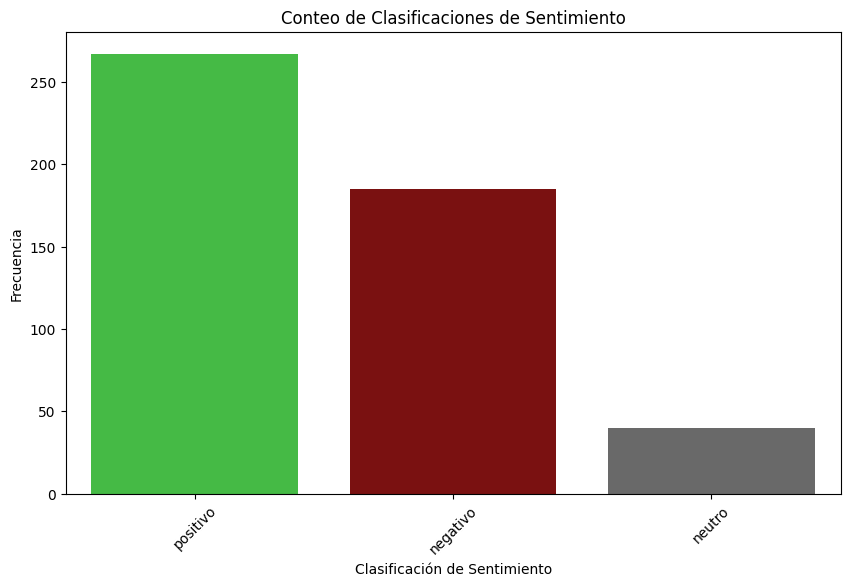

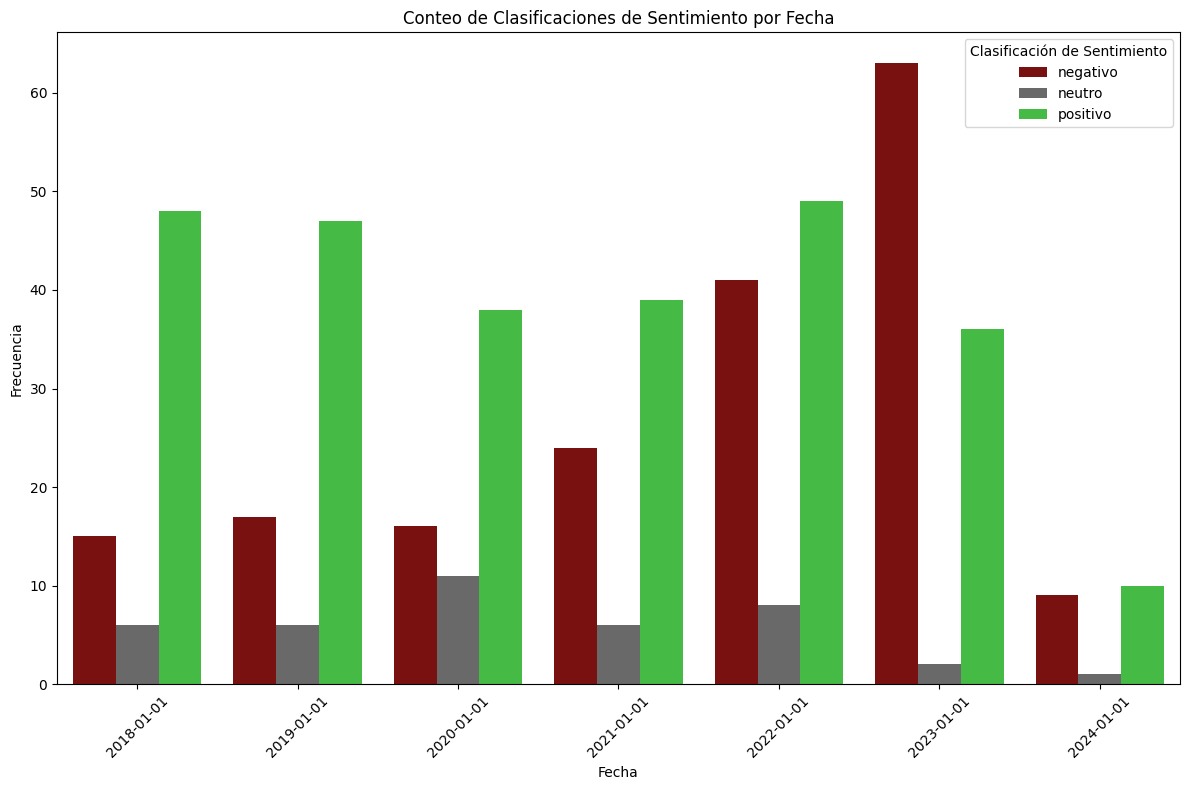

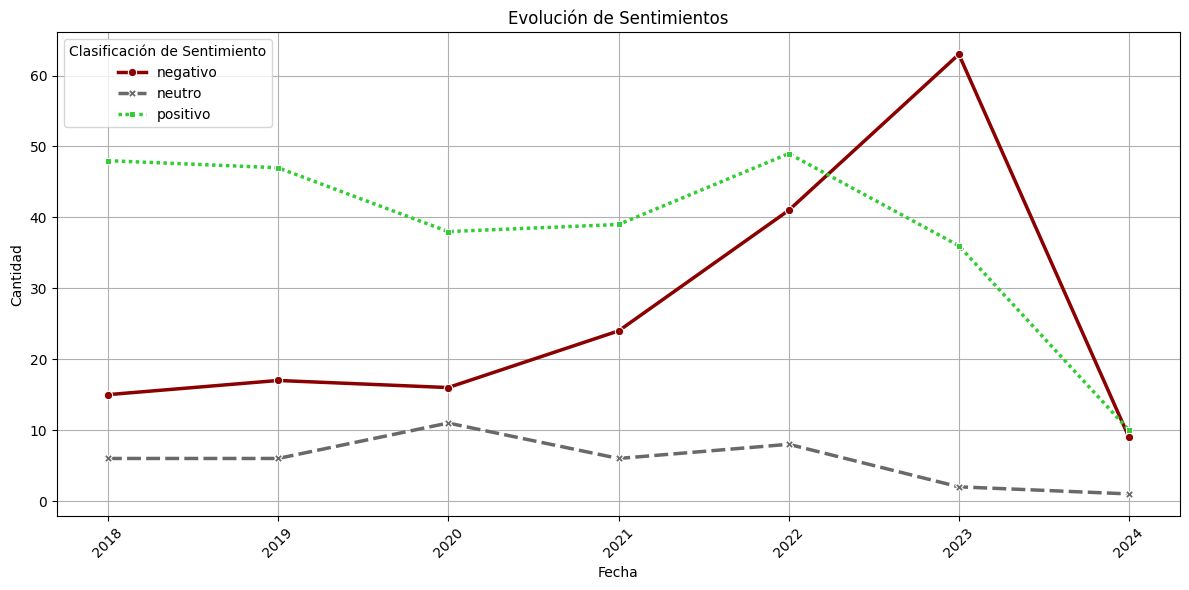

                                        link usuario  nombre usuario  \
0  https://lh3.googleusercontent.com/a-/ALV-UjX0E...           María   
1  https://lh3.googleusercontent.com/a-/ALV-UjXLg...    Luis Barrios   
2  https://lh3.googleusercontent.com/a-/ALV-UjXq6...   Carol Cortijo   
3  https://lh3.googleusercontent.com/a/ACg8ocIZlX...  Albert McTorre   
4  https://lh3.googleusercontent.com/a-/ALV-UjUvZ...         Oyasita   

                                             opinion  Local Guide  Opiniones  \
0  he puesto una queja en la junta de distrito y ...         True         49   
1  muy bien situado, en todo el centro de móstole...         True        233   
2  quiero mencionar a ivan, trabajador del ayunta...        False          5   
3  desde hace aproximadamente 2 meses lleva el pu...         True         22   
4  para sacar un simple volante de empadronamient...         True         21   

   Fotos  Credibilidad      Fecha  \
0     19           585 2024-01-01   
1   1319    

In [ ]:
classifier = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")

# Función para analizar el sentimiento con BERT
def analyze_sentiment_bert(text):
    try:
        result = classifier(text)
        return result[0]['label']
    except Exception as e:
        print(f"Error al analizar sentimiento de '{text}': {e}")
        return None

# Aplicar el análisis de sentimientos a la columna 'Cleaned_Tokens'
df['Sentiment_label'] = df["Cleaned_Tokens"].apply(lambda x: analyze_sentiment_bert(' '.join(x)))


print(df.head())

# Aplicar el análisis de sentimientos a la columna 'Cleaned_Tokens'
df['Sentiment_label'] = df["Cleaned_Tokens"].apply(lambda x: analyze_sentiment_bert(' '.join(x)))

# Crear un diccionario de mapeo para las clasificaciones de sentimiento
sentiment_mapping = {
    '1 star': 'negativo',
    '2 stars': 'negativo',
    '3 stars': 'neutro',
    '4 stars': 'positivo',
    '5 stars': 'positivo'
}

# Crear la nueva columna 'Sentiment_classification' aplicando el mapeo
df['Sentiment_classification'] = df['Sentiment_label'].map(sentiment_mapping)

# Mostrar los resultados
print(df[['Sentiment_label', 'Sentiment_classification']])



# Contar los valores de 'Sentiment_classification'
sentiment_counts = df['Sentiment_classification'].value_counts()
print(sentiment_counts)

# Definir los colores para cada categoría
colors = {'negativo': 'darkred', 'neutro': 'dimgray', 'positivo': 'limegreen'}

# Graficar el conteo de Sentiment_classification con Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette=colors)
plt.title('Conteo de Clasificaciones de Sentimiento')
plt.xlabel('Clasificación de Sentimiento')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()


# Agrupar por Fecha y Sentiment_classification y contar las ocurrencias
sentiment_counts = df.groupby(['Fecha', 'Sentiment_classification']).size().reset_index(name='Count')

# Graficar el conteo de Sentiment_classification por fecha con Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='Fecha', y='Count', hue='Sentiment_classification', data=sentiment_counts, palette=colors)
plt.title('Conteo de Clasificaciones de Sentimiento por Fecha')
plt.xlabel('Fecha')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.legend(title='Clasificación de Sentimiento')
plt.tight_layout()
plt.show()

# Contar los valores de 'Sentiment_classification' por fecha
sentiment_counts = df.groupby(['Fecha', 'Sentiment_classification']).size().unstack(fill_value=0)

# Graficar la evolución de los sentimientos con Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=sentiment_counts, markers=True, linewidth=2.5, palette=colors)
plt.title('Evolución de Sentimientos')
plt.xlabel('Fecha')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.legend(title='Clasificación de Sentimiento')
plt.grid(True)
plt.tight_layout()
plt.show()

print(df.head())

**Tercera retroalimentación:**

El modelo presentado cumple con los requisitos establecidos para esta entrega. Sin embargo, me gustaría ofrecerte algunas sugerencias para enriquecerlo aún más:

1. Para cada desarrollo (gráfico, tabla o modelo) que presentes, te recomendaría incluir una descripción detallada. Esto ayudará al lector a entender cada paso y los resultados obtenidos. Recuerda que este informe final es crucial para el cierre del bootcamp.

2. Me parece muy interesante el análisis que has planteado, especialmente la evaluación de los sentimientos a lo largo del tiempo. Tengo algunas ideas que podrían enriquecer este aspecto y ayudarte a avanzar:

* ¿Cuáles son los factores/variables que influyen en estos cambios de sentimientos a lo largo del tiempo?
* ¿Existe la posibilidad de cuantificar o medir estos factores?
* A partir del análisis de estos factores, ¿cómo podríamos establecer estrategias efectivas para mejorar los sentimientos de la población?

Estas son rutas adicionales que podrías explorar. No es necesario que las incluyas en la entrega final, pero podrían enriquecer tu trabajo y ofrecer nuevas perspectivas sobre el tema.



## **5. Conclusiones (link Power BI)**


https://drive.google.com/file/d/1W5HPLvdhXRURdfGvc0Ma5f2dZ7OUAC9K/view?usp=sharing

**CONCLUSIONES**

Distribución General de Sentimientos (2018-2024):

La mayoría de las opiniones son positivas (55%), seguidas de opiniones negativas (37%) y neutrales (8%). Esto indica que, en general, los ciudadanos tienen una percepción mayoritariamente positiva del ayuntamiento.

Sentimiento Anual:

En los años 2020 y 2023, hubo un aumento significativo en las opiniones negativas. El año 2023 muestra un pico en opiniones negativas, lo que sugiere un evento o problema específico que afectó la percepción pública. Por otro lado, el año 2022 tuvo un alto número de opiniones positivas, indicando posibles mejoras o iniciativas bien recibidas por el público.

Tendencia de los Sentimientos (2018-2024):

La tendencia de opiniones positivas muestra un incremento hasta 2022, seguido por una caída en 2023. Las opiniones negativas tienen un pico en 2023, lo que sugiere insatisfacción con ciertas acciones o eventos durante ese año. Las opiniones neutrales se han mantenido relativamente estables a lo largo del tiempo.

Temas Frecuentes y Sus Sentimientos:

Algunos de los temas más mencionados son "buena atención al público", "cita previa", y "dos personas atendieron". La mayoría de estos temas tienen una tendencia positiva, pero hay algunos temas negativos recurrentes, como "puede aparcar residentes" y "parecía empezar a reparar".

Temas Técnicos:

Investigar otro modelos transformer y verificar si la precisión del modelo es igual o mejor que el aplicado en esta investigación. Tener en cuenta antes de decidir el o los modelos a aplicar que esten entrenados con el idioma objeto de la investigación.

Para obtener los trending topics volver a aplicar los modelos LSA y LDA con algunas transfromaciones adicionales y revisar si mejoran el rendimiento de los Bigramas y/o Trigramas.

Ampliar los objetivos de estudio basado en las conlusiones del estudio y experimentar si el modelo funciona con un problema similar.

## **6. Recomendaciones**

**RECOMENDACIONES**

Investigación en Profundidad para el Año 2023:

Es fundamental realizar un análisis detallado para entender las causas del aumento en opiniones negativas durante 2023. Identificar eventos específicos, políticas o decisiones que llevaron a esta insatisfacción y tomar medidas correctivas será crucial.

Fomentar y Mantener Iniciativas Positivas:

Continuar con las iniciativas que han generado opiniones positivas, especialmente aquellas implementadas en 2022. Promover programas de atención al público que han sido bien recibidos también es importante.

Mejora en la Comunicación y Gestión de Expectativas:

Mejorar la comunicación con los residentes para gestionar mejor las expectativas y reducir opiniones negativas. Aclarar políticas sobre temas recurrentes como el estacionamiento para residentes puede ayudar a disminuir la insatisfacción.

Monitoreo y Respuesta Activa:

Implementar un sistema de monitoreo continuo para detectar rápidamente cambios en la percepción pública. Responder activamente a las críticas y feedback para mostrar a los ciudadanos que sus opiniones son valoradas y consideradas.

Programas de Capacitación y Servicio al Cliente:

Capacitar al personal en atención al cliente para asegurar una experiencia positiva constante para los ciudadanos. Realizar encuestas periódicas para obtener feedback directo y hacer ajustes necesarios en tiempo real es clave.